In [5]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import random
import os,time

from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
import matplotlib.pyplot as plt

In [7]:
def preprocess(data_array: np.ndarray, train_size: float, val_size: float):
    """Splits data into train/val/test sets and normalizes the data.

    Args:
        data_array: ndarray of shape `(num_time_steps, num_routes)`
        train_size: A float value between 0.0 and 1.0 that represent the proportion of the dataset
            to include in the train split.
        val_size: A float value between 0.0 and 1.0 that represent the proportion of the dataset
            to include in the validation split.

    Returns:
        `train_array`, `val_array`, `test_array`
    """

    num_time_steps = data_array.shape[0]
    num_train, num_val = (
        int(num_time_steps * train_size),
        int(num_time_steps * val_size),
    )
    train_array = data_array[:num_train]
    mean, std = train_array.mean(axis=0), train_array.std(axis=0)

    train_array = (train_array - mean) / std
    val_array = (data_array[num_train : (num_train + num_val)] - mean) / std
    test_array = (data_array[(num_train + num_val) :] - mean) / std

    return train_array, val_array, test_array,mean, std

def get_lstm_data(data,sequence_len):
    features=[]
    target=[]
    data_len=len(data)
    for i in range(0,data_len-sequence_len):
        X=data.iloc[i:sequence_len+i][:].to_numpy()
        y=data.iloc[sequence_len+i][0:11].to_numpy()
        features.append(X)
        target.append(y)
    return np.array(features), np.array(target)


def create_batch_data(X,y,train=True,buffer_size=1000,batch_size=128):
    batch_data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    if train:
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else:
        return batch_data.batch(batch_size)

In [8]:
total_data = pd.read_csv("processed_data.csv")
train_size, val_size = 0.5, 0.2

train_array, val_array, test_array,mean, std = preprocess(total_data, train_size, val_size)
print(f"train set size: {train_array.shape}")
print(f"validation set size: {val_array.shape}")
print(f"test set size: {test_array.shape}")

train_datasets,train_labels=get_lstm_data(train_array,10)
train_batch_dataset=create_batch_data(train_datasets,train_labels)
val_datasets,val_labels=get_lstm_data(val_array,10)
val_batch_dataset=create_batch_data(val_datasets,val_labels)
test_datasets,test_labels=get_lstm_data(test_array,10)

train set size: (18164, 12)
validation set size: (7265, 12)
test set size: (10900, 12)


In [12]:

aaaa=pd.DataFrame(train_array)
aaaa.to_csv("处理后的数据.csv")

In [18]:
bbbb=aaaa['汽机旁路系统蒸汽阀平均开度']
cccc=bbbb.to_numpy()
type(cccc)

numpy.ndarray

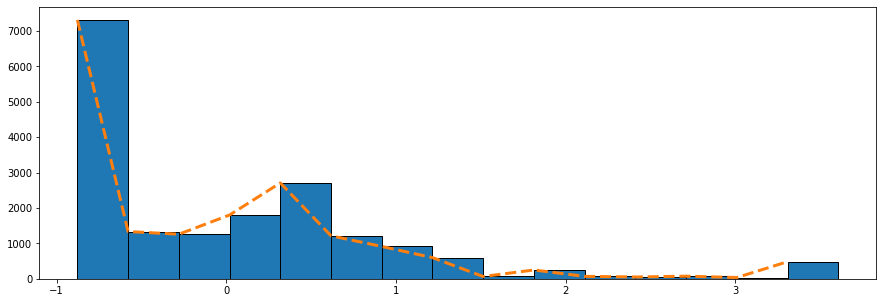

In [25]:
plt.figure(figsize=(15,5))
nums,bins,patches = plt.hist(cccc,bins=15,edgecolor='k')

plt.plot(bins[:-1],nums,'--',lw=3)
plt.show()

In [21]:
bins

array([-0.87841319, -0.50454272, -0.13067226,  0.24319821,  0.61706867,
        0.99093914,  1.3648096 ,  1.73868007,  2.11255053,  2.486421  ,
        2.86029146,  3.23416193,  3.60803239])

In [32]:
cccc

array([-0.87841319, -0.87841319, -0.87841319, ..., -0.65397577,
       -0.65397577, -0.65397577])

In [34]:
dddd=cccc+0.878413
dddd.mean()

0.878413

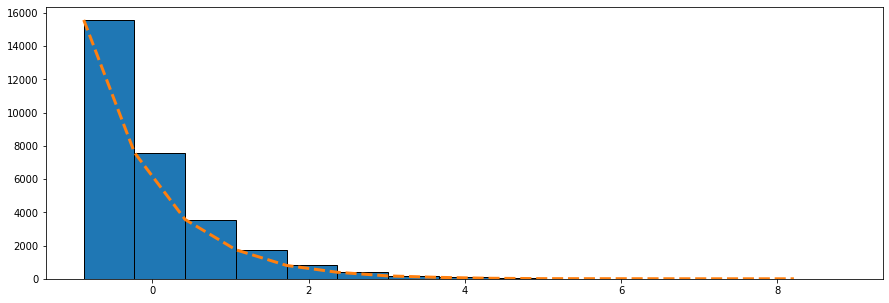

In [2]:
import matplotlib.pyplot as plt
import random
eeee=[]
for i in range(30000):
	eeee.append(random.expovariate(1/0.878413)-0.878413)
plt.figure(figsize=(15,5))
nums,bins,patches = plt.hist(eeee,bins=15,edgecolor='k')

plt.plot(bins[:-1],nums,'--',lw=3)
plt.show()

In [4]:
action_min,action_max=np.amin(train_array.iloc[:,-1]),np.amax(train_array.iloc[:,-1])

In [5]:
print(action_min,action_max)

-0.8784131874704372 3.6080323911297625


In [6]:
model=keras.Sequential([
    layers.LSTM(units=256,input_shape=(10,12),return_sequences=True),
    layers.Dropout(0.4),
    layers.LSTM(units=256,return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(units=128,return_sequences=True),
    layers.LSTM(units=32),
    layers.Dense(11)
])

model.compile(optimizer='adam',loss='mse')
model.load_weights('best_model.hdf5')

In [7]:
print(mean,'\n',std)


一回路压力平均值           8.617001
一环路冷热段平均值        266.850468
堆芯出口温度平均值        271.661830
主蒸汽压力平均值           4.787349
辅助给水流量平均值         32.502430
重要厂用水系统压力        155.820908
DeltaTsat平均值      24.623330
安全壳压力平均值         101.078768
SG1水位平均值           0.883465
稳压器泄压箱压力           0.023395
压缩空气系统压力           0.837326
汽机旁路系统蒸汽阀平均开度     13.046149
dtype: float64 
 一回路压力平均值          3.644202
一环路冷热段平均值        28.271359
堆芯出口温度平均值        35.540318
主蒸汽压力平均值          1.753527
辅助给水流量平均值        21.474391
重要厂用水系统压力        77.657992
DeltaTsat平均值      8.932344
安全壳压力平均值          0.044651
SG1水位平均值          0.994643
稳压器泄压箱压力          0.006594
压缩空气系统压力          0.015622
汽机旁路系统蒸汽阀平均开度    14.851950
dtype: float64


In [8]:
class SGTR_env():
    def __init__(self,model,set_point,train_datasets,mean, std):
        self.action_space=np.array([0]*1)
        self.observation_space=np.array([0]*12)
        self.mean=mean
        self.std=std
        self.response=[]
        self.set_point=set_point
        self.train_datasets=train_datasets
        self.model=model
        self.state= self.train_datasets[random.randint(0, train_datasets.shape[0])]
        self.step_count=0#步数计数

    def reset(self):
        state= self.train_datasets[random.randint(0, train_datasets.shape[0])]
        self.state=np.array(state)
        return np.array(state)[-1]

    def cal_origin_val(self,pos,now_val):
        """
        计算未归一化的值
        """
        val=now_val*self.std[pos]+self.mean[pos]
        return val

    def justice_down (self, next_state,step):
	    """
	    判断是否达到失败条件，deltaT<10或70分钟内未能实现一二回路压力平衡（小于1MP）
	    """
	    ori_deltaT = self.cal_origin_val (6, next_state[-1, 6])
	    #ori_pressure = self.cal_origin_val(0,next_state[-1, 0])
	    if ori_deltaT < 10:# or (step>4200 and ori_pressure<1):
		    return True

	    else:
	        return False

    def step (self, action):
	    self.step_count+=1
	    self.state[-1, -1] = action
	    #model(test_input, training=False)
	    next_variable_state = np.array (self.model(np.array ([self.state]),training=False))
	    next_action = action
	    zip_state_action = np.append (next_variable_state, next_action).reshape (1, -1)
	    next_state = np.append (self.state, zip_state_action, axis=0)
	    next_state = np.delete (next_state, 0, axis=0)
	    ori_temp_last = self.cal_origin_val (1, next_state[-1, 1])
	    ori_temp_before_last = self.cal_origin_val (1, next_state[-2, 1])
	    temp_change_speed = (ori_temp_last - ori_temp_before_last) * 3600
	    reward = 100 - abs (temp_change_speed + 56)
	    done = self.justice_down (next_state,self.step_count)

	    return next_state[-1],reward,done,{}

In [9]:
# import tensorflow_probability as tfp
# import tensorlayer as tl
#
# tfd = tfp.distributions
# Normal = tfd.Normal
#
# tl.logging.set_verbosity(tl.logging.DEBUG)

random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)  # reproducible

#####################  hyper parameters  ####################
# choose env
ENV = 'Pendulum-v0'
action_range = 1.  # scale action, [-action_range, action_range]

# RL training
max_frames = 40000  # total number of steps for training
test_frames = 300  # total number of steps for testing
max_steps = 1000  # maximum number of steps for one episode
batch_size = 64  # udpate batchsize
explore_steps = 500  # 500 for random action sampling in the beginning of training
update_itr = 3  # repeated updates for single step
hidden_dim = 32  # size of hidden layers for networks
q_lr = 3e-4  # q_net learning rate
policy_lr = 3e-4  # policy_net learning rate
policy_target_update_interval = 3  # delayed steps for updating the policy network and target networks
explore_noise_scale = 1.0  # range of action noise for exploration
eval_noise_scale = 0.5  # range of action noise for evaluation of action value
reward_scale = 1.  # value range of reward
replay_buffer_size = 30000  # size of replay buffer


###############################  TD3  ####################################


class ReplayBuffer:
	'''
    a ring buffer for storing transitions and sampling for training
    :state: (state_dim,)
    :action: (action_dim,)
    :reward: (,), scalar
    :next_state: (state_dim,)
    :done: (,), scalar (0 and 1) or bool (True and False)
    '''

	def __init__(self, capacity):
		self.capacity = capacity  #buffer的最大值
		self.buffer = []  #buffer列表
		self.position = 0  #当前输入的位置，相当于指针

	def push(self, state, action, reward, next_state):
		#如果buffer的长度小于最大值，也就是说，第一环的时候，需要先初始化一个“空间”，这个空间值为None，再给这个空间赋值。
		if len(self.buffer) < self.capacity:
			self.buffer.append(None)
		self.buffer[self.position] = (state, action, reward, next_state)
		self.position = int((self.position + 1) % self.capacity)  # as a ring buffer

	def sample(self, batch_size):
		batch = random.sample(self.buffer, batch_size)
		state, action, reward, next_state = map(np.stack, zip(*batch))  # stack for each element
		'''
        the * serves as unpack: sum(a,b) <=> batch=(a,b), sum(*batch) ;
        zip: a=[1,2], b=[2,3], zip(a,b) => [(1, 2), (2, 3)] ;
        the map serves as mapping the function on each list element: map(square, [2,3]) => [4,9] ;
        np.stack((1,2)) => array([1, 2])
        '''
		return state, action, reward, next_state

	def __len__(self):
		return len(self.buffer)


#在代码中没有用到，但我们可以学习下，这里是直接修改gym环境的动作输出，把输出归一化。
# class NormalizedActions(gym.ActionWrapper):
# 	''' normalize the actions to be in reasonable range '''
#
# 	def _action(self, action):
# 		low = self.action_space.low  #动作空间最小值
# 		high = self.action_space.high  #动作空间最大值
#
# 		action = low + (action + 1.0) * 0.5 * (high - low)
# 		action = np.clip(action, low, high)
#
# 		return action
#
# 	def _reverse_action(self, action):
# 		low = self.action_space.low
# 		high = self.action_space.high
#
# 		action = 2 * (action - low) / (high - low) - 1
# 		action = np.clip(action, low, high)
#
# 		return action


class QNetwork():
	''' the network for evaluate values of state-action pairs: Q(s,a) '''

	def __init__(self, num_inputs, num_actions, hidden_dim, init_w=3e-3):
		super(QNetwork, self).__init__()
		self.input_dim = num_inputs + num_actions
		self.net = self.get_net()

	# w_init = tf.keras.initializers.glorot_normal(seed=None)
	# w_init = tf.random_uniform_initializer(-init_w, init_w)
	#
	# self.linear1 = Dense(n_units=hidden_dim, act=tf.nn.relu, W_init=w_init, in_channels=input_dim, name='q1')
	# self.linear2 = Dense(n_units=hidden_dim, act=tf.nn.relu, W_init=w_init, in_channels=hidden_dim, name='q2')
	# self.linear3 = Dense(n_units=1, W_init=w_init, in_channels=hidden_dim, name='q3')

	def get_net(self, name='Q_model'):
		inputs = keras.layers.Input(shape=[self.input_dim], name='C_input')
		x = keras.layers.Dense(64, activation='tanh', name='C_l1')(inputs)
		# x = keras.layers.BatchNormalization()(x)
		x = keras.layers.Dense(32, activation='tanh', name='C_l2')(x)
		# x = keras.layers.BatchNormalization()(x)
		x = keras.layers.Dense(1, name='C_out')(x)
		net = keras.Model(inputs=[inputs], outputs=[x], name='Critic' + name)
		return net

# def forward(self, input):
#     x = self.tanh1(input)
#     x = self.tanh2(x)
#     x = self.tanh3(x)
#     return x


class PolicyNetwork():
	''' the network for generating non-determinstic (Gaussian distributed) action from the state input '''

	def __init__(self, num_inputs, num_actions, hidden_dim, action_range=1., init_w=3e-3):
		super(PolicyNetwork, self).__init__()
		get_custom_objects().update({'swish': Activation(self.self_act)})

		self.num_inputs = num_inputs
		self.action_range = action_range
		self.num_actions = num_actions
		self.net = self.get_net()

	# w_init = tf.keras.initializers.glorot_normal(seed=None)
	#w_init = tf.random_uniform_initializer(-init_w, init_w)

	# self.tanh1 = keras.layers.Dense(hidden_dim, activation='rtanh',
	#                                   name='policy1')  #Dense(n_units=hidden_dim, act=tf.nn.rtanh, W_init=w_init, in_channels=num_inputs, name='policy1')
	# self.tanh2 = keras.layers.Dense(hidden_dim, activation='rtanh',
	#                                   name='policy2')  #Dense(n_units=hidden_dim, act=tf.nn.rtanh, W_init=w_init, in_channels=hidden_dim, name='policy2')
	# self.tanh3 = keras.layers.Dense(hidden_dim, activation='rtanh',
	#                                   name='policy3')  #Dense(n_units=hidden_dim, act=tf.nn.rtanh, W_init=w_init, in_channels=hidden_dim, name='policy3')
	#
	# self.output_tanh = keras.layers.Dense(num_actions,activation='tanh',
	#                                         name='policy_output')  #Dense(n_units=num_actions, W_init=w_init, b_init=tf.random_uniform_initializer(-init_w, init_w), in_channels=hidden_dim, name='policy_output')

	def get_net(self, name='policy_model'):
		"""
        Build actor network
        :param input_state_shape: state
        :param name: name
        :return: act
        """
		inputs = keras.layers.Input(shape=[self.num_inputs], name='A_input')
		# x = keras.layers.BatchNormalization()(inputs)
		x = keras.layers.Dense(64, activation='tanh', name='policy1')(inputs)
		# x = keras.layers.BatchNormalization()(x)
		x = keras.layers.Dense(32, activation='tanh', name='policy2')(x)
		# x = keras.layers.BatchNormalization()(x)
		x = keras.layers.Dense(1, activation='sigmoid', name='policy3')(x)
		#x = keras.layers.Dense(self.num_actions, activation='swish', name='policy_output')(x)
		x = keras.layers.Lambda(lambda x: (np.array(action_max-action_min) * (x)+action_min))(x)            #注意这里，先用tanh把范围限定在[-1,1]之间，再进行映射

		net = keras.Model(inputs=[inputs], outputs=[x], name='Actor' + name)
		return net

	def self_act(self, x):
		#print(x)
		return tf.clip_by_value(x, action_min, action_max)  #1/(1+tf.math.exp(-x))

# def forward(self, state):
#     #x = self.linear0(state)
#     x = self.linear1(state)
#     x = self.linear2(x)
#     x = self.linear3(x)
#
#     output = self.output_linear(x)  # unit range output [-1, 1]
#
#     return output

# def evaluate(self, state, eval_noise_scale):
#     '''
#     generate action with state for calculating gradients;
#     eval_noise_scale: as the trick of target policy smoothing, for generating noisy actions.
#     '''
#     state = state.astype(np.float32)        #状态的type整理
#     action = self.forward(state)            #通过state计算action，注意这里action范围是[-1,1]
#
#     #action = self.action_range * action     #映射到游戏的action取值范围
#
#     # add noise
#     # normal = Normal(0, 1)                   #建立一个正态分布
#     # eval_noise_clip = 2 * eval_noise_scale  #对噪声进行上下限裁剪。eval_noise_scale
#     # noise = normal.sample(action.shape) * eval_noise_scale      #弄个一个noisy和action的shape一致，然后乘以scale
#     # noise = tf.clip_by_value(noise, -eval_noise_clip, eval_noise_clip)  #对noisy进行剪切，不要太大也不要太小
#     # action = action + noise                 #action加上噪音
#
#     return action

#输入state，输出action
def get_action(self, state, explore_noise_scale):
    ''' generate action with state for interaction with envronment '''
    action = self.net.predict(state)         #这里的forward函数，就是输入state，然后通过state输出action。只不过形式不一样而已。最后的激活函数式tanh，所以范围是[-1, 1]
    #print(action,type(action))
    action = action.numpy()[0]              #获得的action变成矩阵。

    # add noise
    # normal = Normal(0, 1)                   #生成normal这样一个正态分布
    # noise = normal.sample(action.shape) * explore_noise_scale       #在正态分布中抽样一个和action一样shape的数据，然后乘以scale
    # action = self.action_range * action + noise     #action乘以动作的范围，加上noise

    return action

def sample_action(self):
    ''' generate random actions for exploration '''
    a = tf.random.uniform([self.num_actions], action_min,action_max)

    return a.numpy()


class TD3_Trainer():

	def __init__(
			self, replay_buffer, hidden_dim, action_range, policy_target_update_interval=1, q_lr=3e-4, policy_lr=3e-4
	):
		self.replay_buffer = replay_buffer

		# initialize all networks
		# 用两个Qnet来估算，doubleDQN的想法。同时也有两个对应的target_q_net
		self.q_net1 = QNetwork(state_dim, action_dim, hidden_dim).net
		self.q_net2 = QNetwork(state_dim, action_dim, hidden_dim).net
		self.target_q_net1 = QNetwork(state_dim, action_dim, hidden_dim).net
		self.target_q_net2 = QNetwork(state_dim, action_dim, hidden_dim).net
		self.policy_net = PolicyNetwork(state_dim, action_dim, hidden_dim, action_range).net
		self.target_policy_net = PolicyNetwork(state_dim, action_dim, hidden_dim, action_range).net
		print('Q Network (1,2): ', self.q_net1)
		print('Policy Network: ', self.policy_net)

		# initialize weights of target networks
		# 把net 赋值给target_network
		self.target_q_net1.set_weights(self.q_net1.get_weights())  #= self.target_ini(self.q_net1, self.target_q_net1)
		self.target_q_net2.set_weights(self.q_net2.get_weights())  # = self.target_ini(self.q_net2, self.target_q_net2)
		self.target_policy_net.set_weights(
			self.policy_net.get_weights())  # = self.target_ini(self.policy_net, self.target_policy_net)

		self.update_cnt = 0  #更新次数
		self.policy_target_update_interval = policy_target_update_interval  #策略网络更新频率

		self.q_optimizer1 = tf.optimizers.Adam(q_lr)
		self.q_optimizer2 = tf.optimizers.Adam(q_lr)
		self.policy_optimizer = tf.optimizers.Adam(policy_lr)

	#在网络初始化的时候进行硬更新
	def target_ini(self, net, target_net):
		''' hard-copy update for initializing target networks '''
		for target_param, param in zip(target_net.trainable_weights, net.trainable_weights):
			target_param.assign(param)
		return target_net

	#在更新的时候进行软更新
	def target_soft_update(self, net, target_net, soft_tau):
		''' soft update the target net with Polyak averaging '''
		for target_param, param in zip(target_net.trainable_weights, net.trainable_weights):
			target_param.assign(  # copy weight value into target parameters
				target_param * (1.0 - soft_tau) + param * soft_tau
				# 原来参数占比 + 目前参数占比
			)
		return target_net

	def update(self, batch_size, eval_noise_scale, reward_scale=10., gamma=0.9, soft_tau=1e-3):
		''' update all networks in TD3 '''
		self.update_cnt += 1  #计算更新次数
		state, action, reward, next_state = self.replay_buffer.sample(batch_size)  #从buffer sample数据

		reward = reward[:, np.newaxis]  # expand dim， 调整形状，方便输入网络

		# 输入s',从target_policy_net计算a'。注意这里有加noisy的
		##改：此处为不加噪音，后续可与加入噪音进行对比
		new_next_action = self.target_policy_net.predict(next_state)  # clipped normal noise#到底裁不裁？？？？？？？？？？？？？？？？？？？

		# 归一化reward.(有正有负)
		# reward = reward_scale * (reward - np.mean(reward, axis=0)) / (np.std(reward, axis=0) + 1e-6)  # normalize with batch mean and std; plus a small number to prevent numerical problem

		# Training Q Function
		# 把s'和a'堆叠在一起，一起输入到target_q_net。
		# 有两个qnet，我们取最小值

		target_q_input = tf.concat([next_state, new_next_action], 1)  # the dim 0 is number of samples
		target_q_min = tf.minimum(self.target_q_net1.predict(target_q_input),
								  self.target_q_net2.predict(target_q_input))

		#计算target_q的值，用于更新q_net
		#之前有把done从布尔变量改为int，就是为了这里能够直接计算。
		target_q_value = reward + gamma * target_q_min  # if done==1, only reward
		#action = action[:, np.newaxis]
		state = state.astype('float32')
		action = action.astype('float32')
		q_input = tf.concat([state, action], 1)  # input of q_net

		q_input = tf.dtypes.cast(q_input, tf.float32)
		#更新q_net1
		#这里其实和DQN是一样的
		with tf.GradientTape() as q1_tape:
			predicted_q_value1 = self.q_net1(q_input)
			q_value_loss1 = tf.reduce_mean(tf.square(predicted_q_value1 - target_q_value))
		q1_grad = q1_tape.gradient(q_value_loss1, self.q_net1.trainable_weights)
		self.q_optimizer1.apply_gradients(zip(q1_grad, self.q_net1.trainable_weights))

		#更新q_net2
		with tf.GradientTape() as q2_tape:
			predicted_q_value2 = self.q_net2(q_input)
			q_value_loss2 = tf.reduce_mean(tf.square(predicted_q_value2 - target_q_value))
		q2_grad = q2_tape.gradient(q_value_loss2, self.q_net2.trainable_weights)
		self.q_optimizer2.apply_gradients(zip(q2_grad, self.q_net2.trainable_weights))

		# Training Policy Function
		# policy不是经常updata的，而qnet更新一定次数，才updata一次
		policy_loss_rec = False
		if self.update_cnt % self.policy_target_update_interval == 0:
			#更新policy_net
			with tf.GradientTape() as p_tape:
				# 计算 action = Policy(s)，注意这里是没有noise的
				new_action = self.policy_net(
					state
				)  # no noise, deterministic policy gradients

				#叠加state和action
				new_q_input = tf.concat([state, new_action], 1)
				# ''' implementation 1 '''
				# predicted_new_q_value = tf.minimum(self.q_net1(new_q_input),self.q_net2(new_q_input))
				''' implementation 2 '''
				predicted_new_q_value = self.q_net1(new_q_input)
				policy_loss = -tf.reduce_mean(predicted_new_q_value)  #梯度上升
				policy_loss_rec = policy_loss
			p_grad = p_tape.gradient(policy_loss, self.policy_net.trainable_weights)
			self.policy_optimizer.apply_gradients(zip(p_grad, self.policy_net.trainable_weights))
			#print(self.policy_net.)

			# Soft update the target nets
			# 软更新target_network三个
			self.target_q_net1 = self.target_soft_update(self.q_net1, self.target_q_net1, soft_tau)
			self.target_q_net2 = self.target_soft_update(self.q_net2, self.target_q_net2, soft_tau)
			self.target_policy_net = self.target_soft_update(self.policy_net, self.target_policy_net, soft_tau)

		if policy_loss_rec:
			return q_value_loss1, q_value_loss2, policy_loss_rec
		else:
			return q_value_loss1, q_value_loss2, 10086

	def save_weights(self, model_path, describe=''):  # save trained weights
		save_path = os.path.join(model_path, describe)
		if not os.path.exists(save_path):
			os.makedirs(save_path)
		self.q_net1.save(save_path + '/model_q_net1.hdf5')
		self.q_net2.save(save_path + '/model_q_net2.hdf5')
		self.target_q_net1.save(save_path + '/model_target_q_net1.hdf5')
		self.target_q_net2.save(save_path + '/model_target_q_net2.hdf5')
		self.policy_net.save(save_path + '/model_policy_net.hdf5')
		self.target_policy_net.save(save_path + '/model_target_policy_net.hdf5')
		return save_path

	# tl.files.save_npz(self.q_net1.trainable_weights, name='model_q_net1.npz')
	# tl.files.save_npz(self.q_net2.trainable_weights, name='model_q_net2.npz')
	# tl.files.save_npz(self.target_q_net1.trainable_weights, name='model_target_q_net1.npz')
	# tl.files.save_npz(self.target_q_net2.trainable_weights, name='model_target_q_net2.npz')
	# tl.files.save_npz(self.policy_net.trainable_weights, name='model_policy_net.npz')
	# tl.files.save_npz(self.target_policy_net.trainable_weights, name='model_target_policy_net.npz')

	def load_weights(self, save_path):  # load trained weights
		self.q_net1 = keras.models.load_model(save_path + '/model_q_net1.hdf5')
		self.q_net2 = keras.models.load_model(save_path + '/model_q_net2.hdf5')
		self.target_q_net1 = keras.models.load_model(save_path + '/model_target_q_net1.hdf5')
		self.target_q_net2 = keras.models.load_model(save_path + '/model_target_q_net2.hdf5')
		self.policy_net = keras.models.load_model(save_path + '/model_policy_net.hdf5')
		self.target_policy_net = keras.models.load_model(save_path + '/model_target_policy_net.hdf5')
	# tl.files.load_and_assign_npz(name='model_q_net1.npz', network=self.q_net1)
	# tl.files.load_and_assign_npz(name='model_q_net2.npz', network=self.q_net2)
	# tl.files.load_and_assign_npz(name='model_target_q_net1.npz', network=self.target_q_net1)
	# tl.files.load_and_assign_npz(name='model_target_q_net2.npz', network=self.target_q_net2)
	# tl.files.load_and_assign_npz(name='model_policy_net.npz', network=self.policy_net)
	# tl.files.load_and_assign_npz(name='model_target_policy_net.npz', network=self.target_policy_net)

from tqdm import tqdm
env = SGTR_env(model=model,set_point=-56,train_datasets=train_datasets,mean=mean,std=std)               #环境
action_dim = env.action_space.shape[0]      #动作空间
state_dim = env.observation_space.shape[0]

# 初始化缓冲区
replay_buffer = ReplayBuffer(replay_buffer_size)

# 初始化agent
td3_trainer=TD3_Trainer(replay_buffer, hidden_dim=hidden_dim, policy_target_update_interval=policy_target_update_interval, action_range=action_range, q_lr=q_lr, policy_lr=policy_lr )

Q Network (1,2):  <keras.engine.functional.Functional object at 0x0000024148C56748>
Policy Network:  <keras.engine.functional.Functional object at 0x0000024151FC1148>


In [ ]:

frame_idx = 0                           #总步数
rewards = []                            #记录每个EP的总reward
t0 = time.time()
while frame_idx < max_frames:           #小于最大步数，就继续训练
    state = env.reset()                 #初始化state
    state = state.astype(np.float32)    #整理state的类型
    episode_reward = 0


    # 开始训练
    for step in tqdm(range(max_steps)):
        if frame_idx > explore_steps:       #如果小于500步，就随机，如果大于就用get-action
            action = td3_trainer.policy_net.predict(np.array([state]))+tf.clip_by_value(tf.random.normal([1],0,0.06),-1,1)    #带有noisy的action
        else:
            action = tf.random.uniform([1], action_min,action_max)

        # 与环境进行交互
        next_state, reward, done, _ = env.step(action)
        next_state = next_state.astype(np.float32)
        action = np.array(action).tolist()
        done = 1 if done ==True else 0

        #记录数据在replay_buffer
        replay_buffer.push(state, action, reward, next_state)

        #赋值state，累计总reward，步数
        state = next_state
        episode_reward += reward


        #如果数据超过一个batch_size的大小，那么就开始更新
        if len(replay_buffer) > batch_size:
            for i in range(update_itr):         #注意：这里更新可以更新多次！
                td3_trainer.update(batch_size, eval_noise_scale=0.1, reward_scale=0.1)


        # if done:
        #     break
    frame_idx+=1
    episode=frame_idx  # current episode
    all_episodes = max_frames # total episodes
    print(
            '\rEpisode: {}/{}  | Episode Reward: {:.4f}  | Running Time: {:.4f}| State: {}'.format(
                episode, all_episodes, episode_reward,
                time.time()-t0,state
            ), end=''
        )


    # print(episode_reward,'###',state)
    rewards.append(episode_reward)
plt.plot(rewards)
plt.show()
td3_trainer.save_weights()